# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [74]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [75]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [76]:
# Preprocess the data
# MNIST dataset is grayscale 28x28
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# digits from 0 to 9
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefull while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [77]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Build the CNN model
model = Sequential()

model.add(Conv2D(10, input_shape=(28, 28, 1), kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, kernel_size=(5, 5), activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [78]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 49s 103ms/step - loss: 1.8006 - accuracy: 0.3619 - val_loss: 0.9266 - val_accuracy: 0.8722
Epoch 2/10
469/469 [==============================] - 40s 85ms/step - loss: 0.7875 - accuracy: 0.7383 - val_loss: 0.4610 - val_accuracy: 0.9237
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 0.5540 - accuracy: 0.8208 - val_loss: 0.3195 - val_accuracy: 0.9425
Epoch 4/10
469/469 [==============================] - 32s 68ms/step - loss: 0.4545 - accuracy: 0.8574 - val_loss: 0.2633 - val_accuracy: 0.9507
Epoch 5/10
469/469 [==============================] - 33s 70ms/step - loss: 0.4006 - accuracy: 0.8750 - val_loss: 0.2261 - val_accuracy: 0.9566
Epoch 6/10
469/469 [==============================] - 31s 67ms/step - loss: 0.3607 - accuracy: 0.8874 - val_loss: 0.1962 - val_accuracy: 0.9595
Epoch 7/10
469/469 [==============================] - 31s 67ms/step - loss: 0.3365 - accuracy: 0.8973 - val_loss: 0.1774 - val_accuracy

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 3s 10ms/step - loss: 0.1404 - accuracy: 0.9693
Test Accuracy: 0.9692999720573425


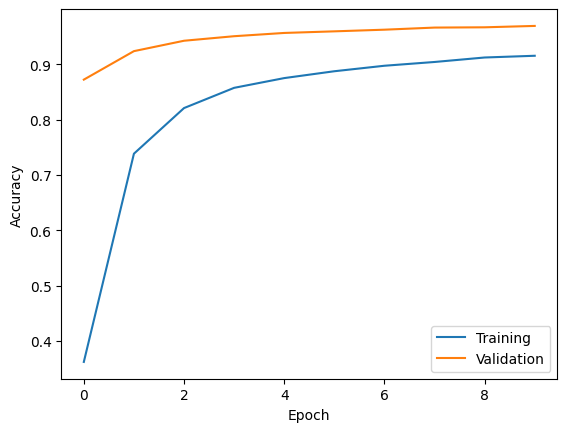

In [82]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()